In [ ]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve
import pickle
from sklearn.ensemble import RandomForestClassifier
import scipy.spatial.distance as spd
import sklearn.preprocessing as pp
from sklearn.decomposition import PCA
import numpy.linalg as la
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC


In [3]:
data_file = './data/MNISTsmall.p'
D = pickle.load(open(data_file, 'rb'))
print(D.keys())
X = D.data
y = D.target
f = D.foldTrain
print(X.shape)


dict_keys(['data', 'target', 'DESCR', 'target_names', 'foldTrain'])
(784, 15000)


- Normalizar
- PCA (50, 100, 150, 200)
- classificar

# Normalizar

In [ ]:
X = X+1.

sc = StandardScaler().fit(X.T)
Xn = sc.transform(X.T).T
Xn.shape


(784, 15000)

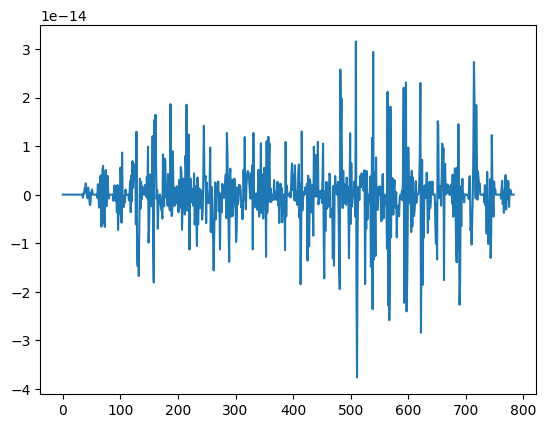

In [10]:
plt.plot(np.mean(Xn, axis=1))


# PCA

In [ ]:
pca = PCA(n_components=1-1e-10).fit(Xn.T)
Xp = pca.transform(Xn.T).T
Xp.shape


(670, 15000)

In [ ]:
X1 = Xp[:, f]
y1 = y[f]
X2 = Xp[:, f==False]
y2 = y[f==False]


In [ ]:
idx = rd.permutation(X1.shape[1])
X1=X1[:, idx]
y1=y1[idx]


In [ ]:
svm = SVC().fit(X1.T, y1)
y2e = svm.predict(X2.T)


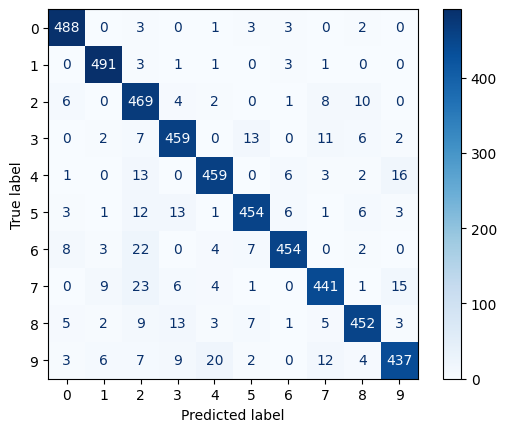

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y2, y2e)
ConfusionMatrixDisplay(cm).plot(cmap = 'Blues')


In [ ]:
print(np.sum(y2 != y2e))
print(np.sum(y2 != y2e)/5000)


396
0.0792


In [42]:
X1p = X1[:200,:]
X2p = X2[:200,:]
svm = SVC().fit(X1p.T, y1)
y2e = svm.predict(X2p.T)

359
0.0718


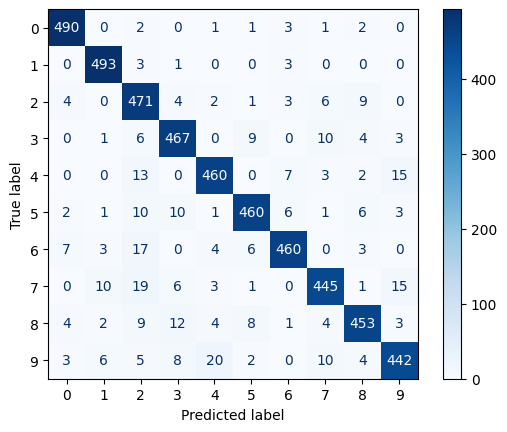

In [44]:
cm = confusion_matrix(y2, y2e)
print(np.sum(y2!=y2e))
print(np.sum(y2!=y2e)/5000)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')